In [1]:
import time
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from selectinf.Simulation.simulation_helpers import (one_sim_mode, one_sim_mode_serial,
                                generate_gaussian_instance_nonlinear_interaction_simple,
                                generate_gaussian_instance_nonlinear_interaction,
                                )
from selectinf.Simulation.spline_instance import (generate_gaussian_instance_from_bspline_interaction, generate_gaussian_instance_nonlinear_interaction,
 gaussian_group_polynomial_interaction_instance)
from selectinf.group_lasso_query import (group_lasso,
                                         split_group_lasso)
from selectinf.Simulation.simulation_helpers import (naive_inference_inter, data_splitting_inter,
                                MLE_inference_inter,
                                calculate_F1_score_interactions)
from selectinf.Simulation.spline_instance import (
    generate_gaussian_instance_nonlinear_interaction_block)
from multiprocessing import Pool

from functools import partial

In [2]:
def plot_ecdf(data):
    # Step 2: Sort the data
    data_sorted = np.sort(data)
    
    # Step 3: Calculate the empirical CDF
    # For each point, the CDF value is the proportion of data points less than or equal to that point
    cdf_values = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    
    # Step 4: Plot the empirical CDF
    plt.figure(figsize=(10, 6))
    plt.step(data_sorted, cdf_values, where='post', label='Empirical CDF')
    plt.title('Empirical Cumulative Distribution Function')
    # Add a y=x line
    plt.plot(data_sorted, data_sorted, label='Uniform CDF', linestyle='--')
    plt.xlabel('Data Points')
    plt.ylabel('CDF')
    plt.grid(True)
    plt.legend()
    plt.show()

In [3]:
(design, data_interaction, Y, Y_mean, X,
     active, active_inter_adj, active_inter_list, groups, gamma) \
        = gaussian_group_polynomial_interaction_instance(n=500,
                                                         p=100,
                                                         s=5,
                                                         rho=0.5, full_corr=True,
                                                         rho_noise=0.5,
                                                         equicorrelated=True,
                                                         SNR = 0,
                                                         order=2,
                                                         interaction_signal=0,
                                                         random_signs=False,
                                                         scale=True,
                                                         center=True,
                                                         structure='weakhierarchy',
                                                         s_interaction=0,
                                                         intercept=True)

In [4]:
const = group_lasso.gaussian
coverages, lengths, selected_interactions, p_values, targets, task_idx \
    = naive_inference_inter(X=design, Y=Y, groups=groups,
                            Y_mean=Y_mean, const=const,
                            n_features=100, interactions=data_interaction,
                            weight_frac=0.5, level=0.9, mode='weakhierarchy',
                            solve_only=False, continued=False,
                            parallel=False, p_val=True, intercept=True)

Naive Selected Groups: 12


In [5]:
coverages, lengths, selected_inter, p_values, targets, task_idx\
    = data_splitting_inter(X=design, Y=Y, groups=groups,
                           Y_mean=Y_mean, const=const,
                           n_features=100, interactions=data_interaction,
                           proportion=0.5,
                           weight_frac=0.5, level=0.9, mode='weakhierarchy',
                           solve_only=False, continued=False, parallel=False,
                           p_val=True)

DS Selected Groups: 39


In [6]:
coverages, lengths, selected_inter, p_values, targets, task_idx\
    = MLE_inference_inter(X=design, Y=Y, Y_mean=Y_mean, groups=groups,
                           n_features=100, interactions=data_interaction,
                          intercept=True,
                           proportion=0.5, weight_frac=0.5, level=0.9, mode='stronghierarchy',
                           solve_only=False, continued=False, parallel=True,
                           p_val=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


MLE Selected Groups: 101


Process SpawnPoolWorker-8:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-4:
Traceback (most recent call last):
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/selectinf/Simulation/simulation_helpers.py", line 583, in interaction_selective_single_parallel
    S = np.linalg.inv(X_aug.T @ X_aug)
  File "<__array_function__ internals>", line 180, in inv
  File "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/numpy/linalg/li

KeyboardInterrupt: 

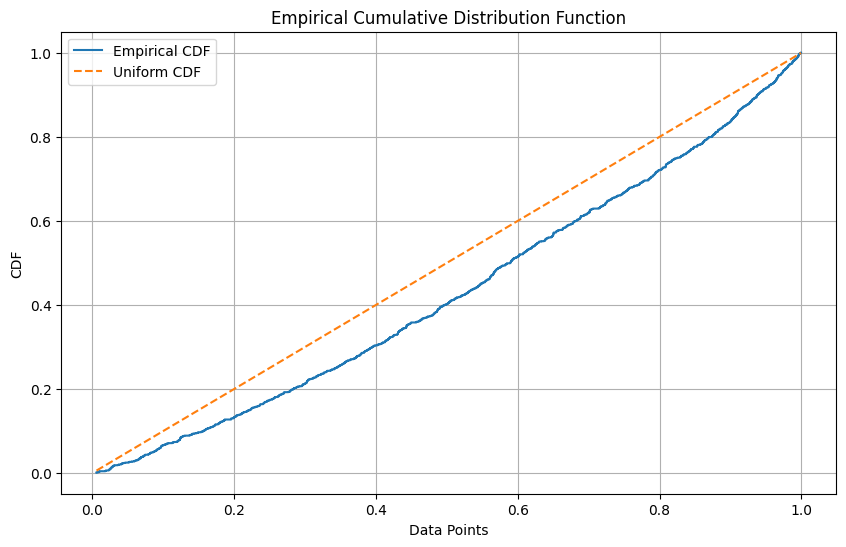

In [7]:
plot_ecdf(p_values)

In [8]:
np.mean(coverages)

0.8903743315508021

In [ ]:
p_values_30 = []
cov_30 = []
const = group_lasso.gaussian
for i in range(100):
    (design, data_interaction, Y, Y_mean, X,
     active, active_inter_adj, active_inter_list, groups) \
        = gaussian_group_polynomial_interaction_instance(n=500,
                                                         p=20,
                                                         s=5,
                                                         rho=0.5, full_corr=True,
                                                         rho_noise=0.5,
                                                         equicorrelated=True,
                                                         SNR = 0,
                                                         order=2,
                                                         interaction_signal=0,
                                                         random_signs=False,
                                                         scale=True,
                                                         center=True,
                                                         structure='stronghierarchy',
                                                         s_interaction=0,
                                                         intercept=True)
    while True:
        
        """coverages, lengths, selected_inter, p_values \
            = naive_inference_inter(X=design, Y=Y, groups=groups,
                                    Y_mean=Y_mean, const=const,
                                    n_features=20, interactions=data_interaction,
                                    weight_frac=0.25, level=0.9, mode='allpairs',
                                    solve_only=False, continued=False,
                                    parallel=False, p_val=True, intercept=True)"""
        
        
        """coverages, lengths, selected_inter, p_values \
            = data_splitting_inter(X=design, Y=Y, groups=groups,
                           Y_mean=Y_mean, const=const,
                           n_features=20, interactions=data_interaction,
                           proportion=0.5,
                           weight_frac=0.25, level=0.9, mode='weakhierarchy',
                           solve_only=False, continued=False, parallel=False,
                           p_val=True)"""
        
        
        coverages, lengths, selected_inter, p_values\
            = MLE_inference_inter(X=design, Y=Y, Y_mean=Y_mean, groups=groups,
                           n_features=20, interactions=data_interaction,
                          intercept=True,
                           proportion=0.5, weight_frac=0.25, level=0.9, mode='stronghierarchy',
                           solve_only=False, continued=False, parallel=True,
                           p_val=True)
        
        if coverages is not None:
            p_values_30.extend(list(p_values))
            cov_30.append(np.mean(coverages))
            break

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

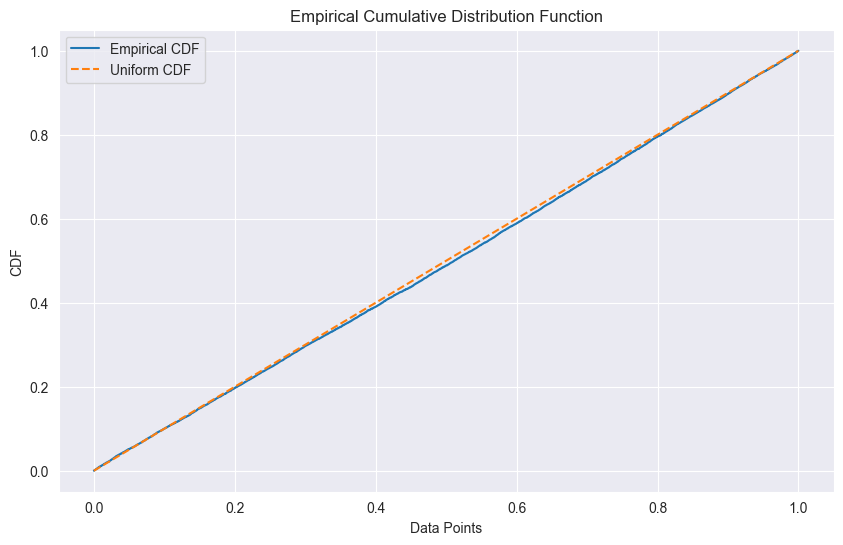

In [156]:
plot_ecdf(p_values_30)

In [11]:
print(np.mean(cov_30))

NameError: name 'cov_30' is not defined

In [115]:
coverages_ds, lengths_ds, selected_inter_ds, p_values_ds \
    = data_splitting_inter(X=design, Y=Y, groups=groups,
                           Y_mean=Y_mean, const=const,
                           n_features=100, interactions=data_interaction,
                           proportion=0.5,
                           weight_frac=0.5, level=0.9, mode='weakhierarchy',
                           solve_only=False, continued=False, parallel=False,
                           p_val=True)


21.0
DS Selection Size: 122


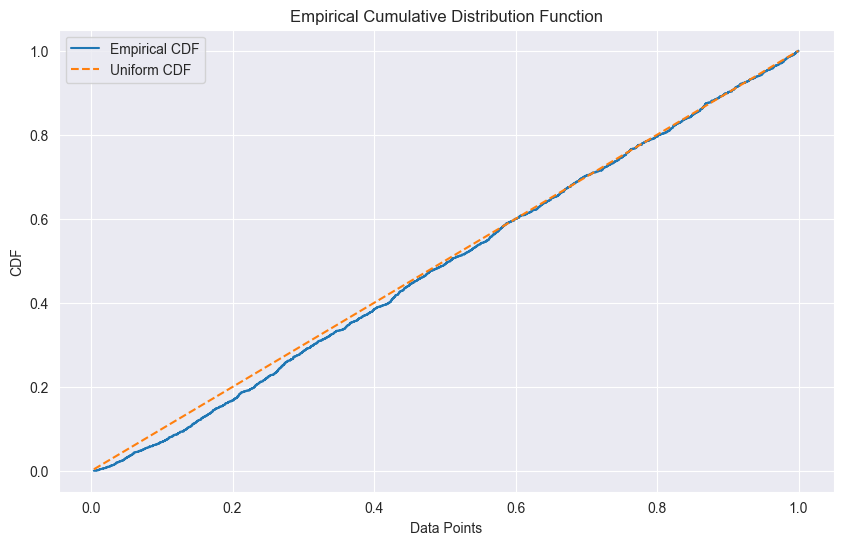

In [116]:
plot_ecdf(p_values_ds)

In [66]:
np.mean(lengths_ds)

8.019015947836863

In [120]:
coverages_MLE, lengths_MLE, selected_inter_MLE, p_values_MLE\
    = MLE_inference_inter(X=design, Y=Y, Y_mean=Y_mean, groups=groups,
                           n_features=30, interactions=data_interaction,
                          intercept=False,
                           proportion=0.5, weight_frac=10, level=0.9, mode='weakhierarchy',
                           solve_only=False, continued=False, parallel=False,
                           p_val=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


28.0
0 th interaction out of 245
1 th interaction out of 245
2 th interaction out of 245
3 th interaction out of 245
4 th interaction out of 245


KeyboardInterrupt: 

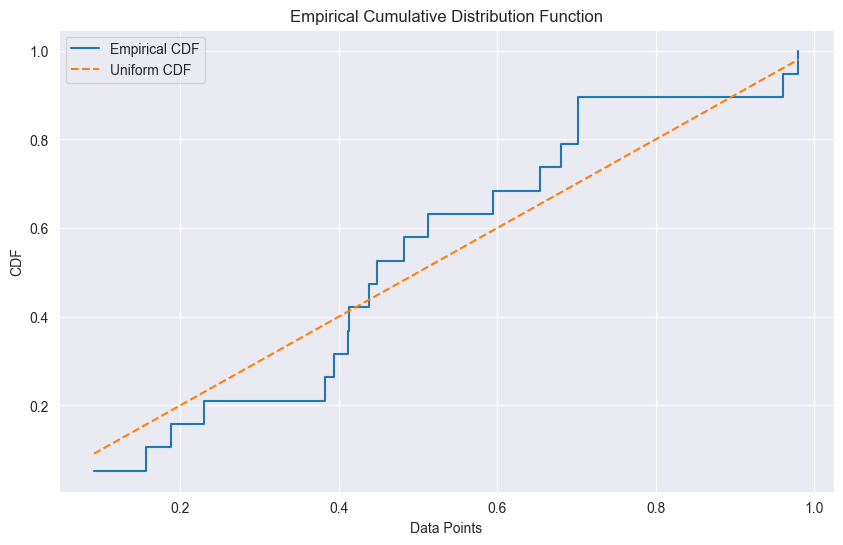

0.9473684210526315


In [77]:
plot_ecdf(p_values_MLE)
print(np.mean(coverages_MLE))

In [78]:
np.mean(lengths_MLE)

3.554918650077396